Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [2]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

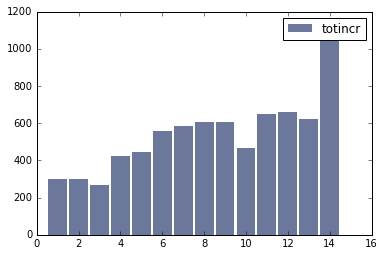

In [3]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

In [ ]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

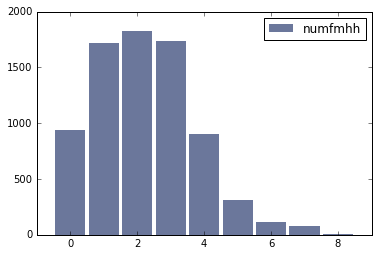

In [4]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

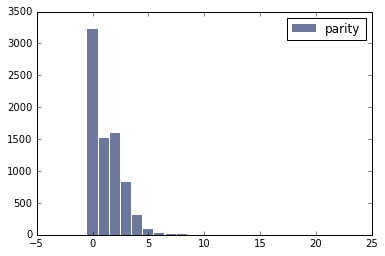

1519


In [12]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show()

# The most frequent number of children borne is zero

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [16]:
print hist.Largest()

[(22, 1), (16, 1), (10, 3), (9, 2), (8, 8), (7, 15), (6, 29), (5, 95), (4, 309), (3, 828)]


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

In [42]:
resp_income_order = resp.sort_values('totincr')
hi_income = resp_income_order.tail(50)

print "mean:               %3.2f" % hi_income.parity.mean()
print "variance:           %3.2f" % hi_income.parity.var()
print "standard deviation: %3.2f" % hi_income.parity.std()

mean:               1.14
variance:           1.10
standard deviation: 1.05


Find the largest parities for high income respondents.

In [36]:
print hi_income.parity.value_counts()

0    20
2    19
1     7
3     4
Name: parity, dtype: int64


Compare the mean <tt>parity</tt> for high income respondents and others.

In [46]:
other = resp_income_order[:-50]

print "high income mean parity: %3.2f" % hi_income.parity.mean()
print "other mean parity:       %3.2f" % other.parity.mean()

high income mean parity: 1.14
other mean parity:       1.22


Investigate any other variables that look interesting.

In [72]:
print "high income on own: %f" % (sum(hi_income.onown18==1) / float(len(hi_income)))
print "low income on own:  %f" % (sum(other.onown18==1) / float(len(other)))

high income on own: 0.120000
low income on own:  0.239036


### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [59]:
import nsfg
df = nsfg.ReadFemPreg()

In [65]:
firsts = df[df.pregordr==1]
others = df[df.pregordr!=1]

print "first child weight: %3.3f" % firsts.totalwgt_lb.mean()
print "other child weight: %3.3f" % others.totalwgt_lb.mean()

import math
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

print "cohen effect: %f" % CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

first child weight: 7.204
other child weight: 7.301
cohen effect: -0.069118


In [66]:
print "first child pregnancy length: %3.3f" % firsts.prglngth.mean()
print "other child pregnancy length: %3.3f" % others.prglngth.mean()

print "cohen effect: %f" % CohenEffectSize(firsts.prglngth, others.prglngth)

first child pregnancy length: 29.259
other child pregnancy length: 29.691
cohen effect: -0.031312
